How well do jobs and skills pay for Data Analysts?

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df.job_skills.apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_CA = df[df.job_country=='Canada'].copy()

In [14]:
df_CA = df_CA[df_CA.job_title_short.str.contains('Data')]

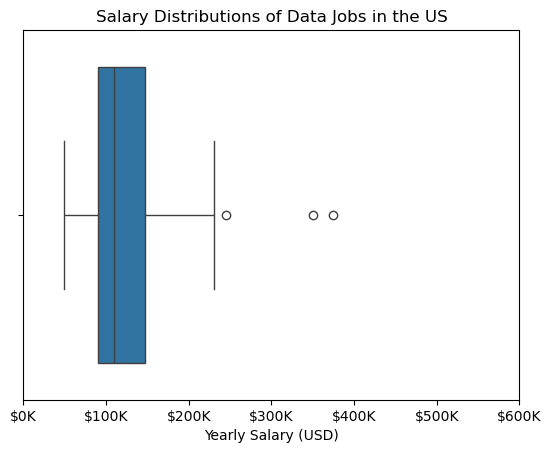

In [15]:
sns.boxplot(data = df_CA, x = 'salary_year_avg')

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

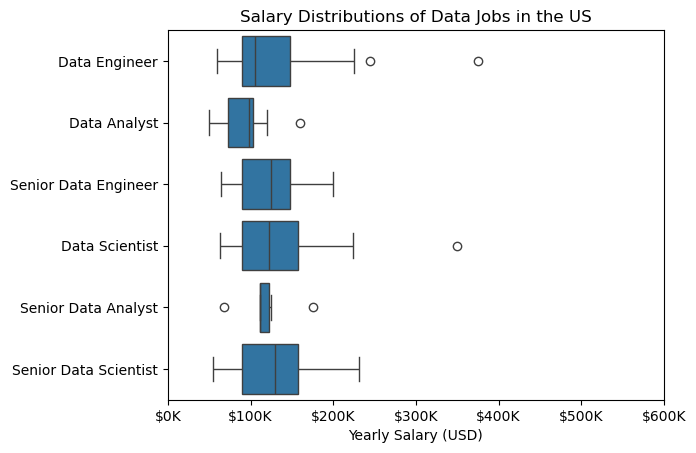

In [16]:
sns.boxplot(data = df_CA, x = 'salary_year_avg', y = 'job_title_short')
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [17]:
df_DA_CA = df_CA[df_CA.job_title_short=='Data Analyst'].copy()

In [18]:
df_DA_CA_explode = df_DA_CA.explode('job_skills')

In [35]:
df_top_paid_skills = df_DA_CA_explode.groupby(by = 'job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_skills', 'count')
).sort_values(by = ['median_salary','job_count'], ascending = False).head(10)

In [40]:
df_demand_skills = df_DA_CA_explode.groupby(by = 'job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_skills', 'size')
).sort_values(by = ['median_salary'], ascending = False).head(10)

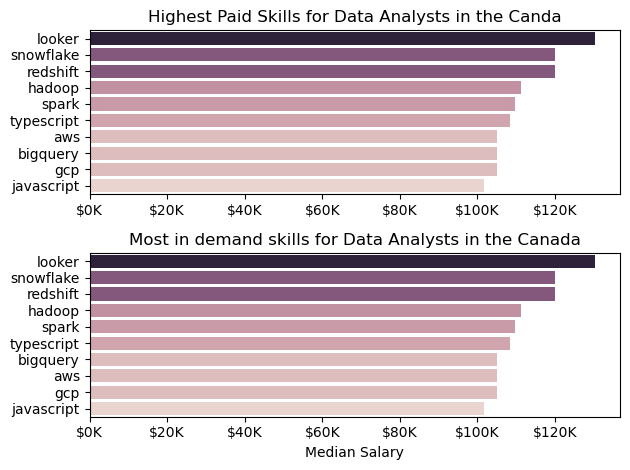

In [44]:
fig, ax = plt.subplots(2,1)

sns.barplot(data = df_top_paid_skills, x = 'median_salary', y = 'job_skills', ax = ax[0], hue = 'median_salary')
ax[0].set_title('Highest Paid Skills for Data Analysts in the Canda')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().set_visible(False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))


sns.barplot(data = df_demand_skills, x = 'median_salary', y = 'job_skills', ax = ax[1], hue = 'median_salary')
ax[1].set_title('Most in demand skills for Data Analysts in the Canada')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().set_visible(False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()